## Wigner function

Wigner distribution function gives the phase space distribution of a function. <br>
The definition is as follows, as per Advances in Optics and Photonics 3, 272–365 (2011) : <br><br>

$W_{f}(p,q) = \left(\dfrac{|K|}{2\pi}\right)^{N}\int f^{*}\left(q-\dfrac{q^{'}}{2}\right) f\left(q+\dfrac{q^{'}}{2}\right)exp(-iKq^{'}.p)d^{N}q^{'}$<br><br>

Direct integration is too slow as shown below.<br>



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import gaussian
import quadpy
from tqdm import tqdm
from numba import jit,prange

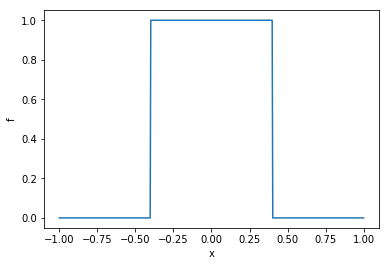

In [2]:
N = 500
f = np.zeros(N)
f[int(N/2)-int(N/5):int(N/2)+int(N/5)]=1
#f = gaussian(N,10)
x = np.linspace(-1,1,N)
plt.plot(x,f)
plt.ylabel('f')
plt.xlabel('x')
plt.show()

In [3]:
scale_factor = 3 #Scale domain by this much
domain_real = np.linspace(-scale_factor,scale_factor,scale_factor*N)
domain_freq = np.fft.fftshift(np.fft.fftfreq(scale_factor*N,domain_real[1]-domain_real[0]))

In [4]:
def f1(f,f_,y,domain):
    i = int((y-domain[0])/(domain[1]-domain[0]))
    f_[:] = 0
    N = len(f)
    f_[i-int(N/2):i+int(N/2)] = f
    return f_

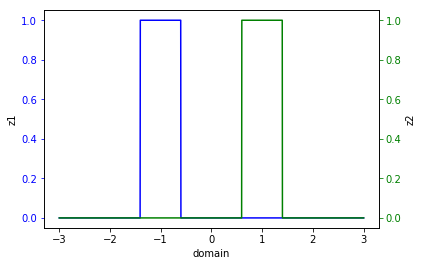

In [5]:
z1 = np.zeros(scale_factor*N)
z2 = np.zeros(scale_factor*N)
q1 = -2
z1 = f1(f,z1,q1/2,domain_real)
z2 = f1(f,z2,-q1/2,domain_real)
fig,ax1 = plt.subplots(1,1)
ax1.plot(domain_real,z1,'b')
ax1.tick_params('y', colors='b')
ax1.set_ylabel('z1')
ax2 = ax1.twinx()
ax2.plot(domain_real,z2,'g')
ax2.tick_params('y', colors='g')
ax2.set_ylabel('z2')
ax1.set_xlabel('domain')
plt.show()

In [6]:
W = np.zeros((len(domain_real),len(domain_freq)),dtype=np.complex128)

In [7]:
@jit
def fill_W(domain_real,domain_freq,f,W,N,scale_factor):
    for q1 in tqdm(np.linspace(-2,2,250)):
        z1 = np.zeros(scale_factor*N)
        z2 = np.zeros(scale_factor*N)
        z1 = f1(f,z1,q1/2,domain_real)
        z2 = f1(f,z2,-q1/2,domain_real)
        for j in prange(scale_factor*N):
            for i in prange(scale_factor*N):
                p = domain_real[i]
                q = domain_freq[j]
                phase_factor = np.exp(-1j*q1*q)
                W[i][j] += z1[i]*z2[i]*phase_factor

In [8]:
fill_W(domain_real,domain_freq,f,W,N,scale_factor)

100%|██████████| 250/250 [1:33:54<00:00, 22.61s/it]


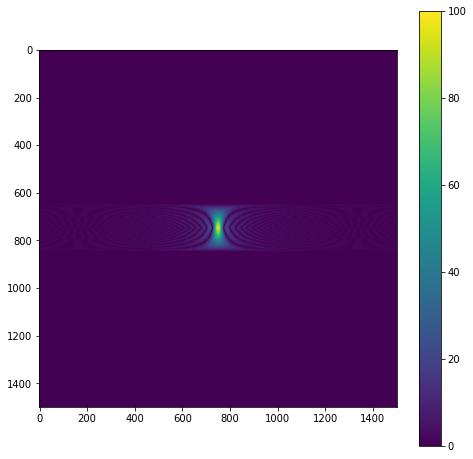

In [9]:
plt.rcParams["figure.figsize"] = (8,8)
plt.imshow(np.abs(W))
plt.colorbar()
plt.show()

In [10]:
F = np.abs(np.fft.fftshift(np.fft.fft(f)))
F = F/(np.max(np.abs(F)))

In [11]:
scale_factor = 3 #Scale domain by this much
domain_real = np.linspace(domain_freq[0],domain_freq[-1],scale_factor*N)
domain_freq = np.fft.fftshift(np.fft.fftfreq(scale_factor*N,domain_real[1]-domain_real[0]))

In [12]:
W = np.zeros((len(domain_freq),len(domain_real)),dtype=np.complex128)

In [13]:
fill_W(domain_real,domain_freq,F,W,N,scale_factor)

100%|██████████| 250/250 [1:31:46<00:00, 22.24s/it]


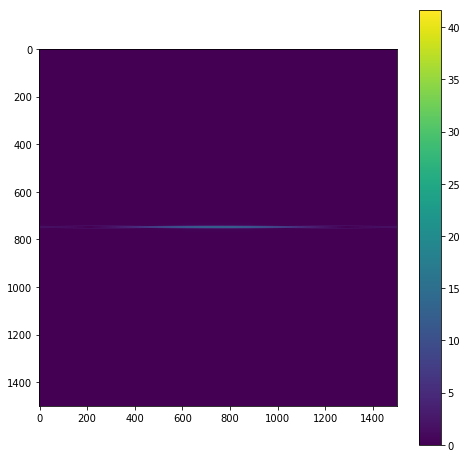

In [14]:
plt.rcParams["figure.figsize"] = (8,8)
plt.imshow(np.abs(W))
plt.colorbar()
plt.show()